# Pistucha pika (*Ochotona princeps*)

### Ho Dieu Hien

![](https://cdn0.vox-cdn.com/thumbor/D2Tt1qqWwH7m7Bb6NeKlZaqP-Ig=/0x93:1773x1090/1600x900/cdn0.vox-cdn.com/uploads/chorus_image/image/48998709/pika_pikachu.0.0.jpg)

## Obecne informace
**Vyskyt**: Horske oblasti (skalni sute kolem alpinskych luk) na zapade Severni Ameriky 

Pistucha pika (*Ochotona princeps*) je denni bylozravy savec. Hnizdo si buduje v prostoru pod kameny, nehrabe si nory. Neupada do zimniho spanku - dela si velke zasoby rostlin na zimu - umi si vybrat nutricne bohatou potravu s vysokym obsahem vody. Dokonce umi rozlisit "datum spotreby" a podle toho skladuje sve jidlo.

Kazda pika ma svoje hnizdo, sve teritorium si chrani - jednotliva uzemi se ale mohou prekryvat. Ke komunikaci pouzivaji zvukove signaly - kratkymi hvizdy se navzajem varuji pred predatory. V dobe pareni se samec ozyva dlouhym zpevnym volanim.

Piky obyvaji chladnejsi oblasti ve vyssich nadmorskych vyskach - globalni oteplovani 
Protoze ziji ve vyssich (a studenejsich) nadmorskych vyskach, jsou velmi citlivi vuci vyssim teplotam - pravdepodobne detekuji projevy globalniho oteplovani v zapadnim USA presouvanim sveho habitatu do jeste vyssich oblasti.

**Zdroje**:
http://www.stoplusjednicka.cz/americka-pistucha-pika-pilni-sberac-sena  
https://en.wikipedia.org/wiki/American_pika  
http://www.chovzvirat.cz/zvire/3062-pika/


## Predpriprava analyzy

In [1]:
!cat Ochotona_princeps.pika.86.gtf | grep -E "\s+gene\s+" > Ochotona_princeps.pika.86_gene.gtf

In [2]:
!cat Ochotona_princeps.pika.86.gtf | grep -E "\s+transcript\s+" > Ochotona_princeps.pika.86_transcript.gtf

In [3]:
!cat Ochotona_princeps.pika.86.gtf | grep -E "\s+exon\s+" > Ochotona_princeps.pika.86_exon.gtf

In [4]:
!cat Ochotona_princeps.pika.86.gtf | grep -E "\s+CDS\s+" > Ochotona_princeps.pika.86_CDS.gtf

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
import re

In [6]:
gene=pd.read_table('/home/ja/Downloads/Ochotona_princeps.pika.86_gene.gtf', header=None, dtype={0:np.object})

In [7]:
transcript=pd.read_table('/home/ja/Downloads/Ochotona_princeps.pika.86_transcript.gtf', header=None, dtype={0:np.object})

In [8]:
exon=pd.read_table('/home/ja/Downloads/Ochotona_princeps.pika.86_exon.gtf', header=None, dtype={0:np.object})

In [9]:
CDS=pd.read_table('/home/ja/Downloads/Ochotona_princeps.pika.86_CDS.gtf', header=None, dtype={0:np.object})

In [10]:
gene.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcript.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
exon.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
CDS.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [11]:
gene.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,GeneScaffold_2858,ensembl,gene,843148,843263,.,+,.,"gene_id ""ENSOPRG00000020781""; gene_version ""1""..."
1,GeneScaffold_2858,ensembl,gene,1115840,1116766,.,-,.,"gene_id ""ENSOPRG00000013495""; gene_version ""1""..."
2,GeneScaffold_2858,ensembl,gene,1123897,1125191,.,+,.,"gene_id ""ENSOPRG00000013501""; gene_version ""1""..."
3,GeneScaffold_2858,ensembl,gene,1129165,1186490,.,-,.,"gene_id ""ENSOPRG00000013519""; gene_version ""1""..."
4,GeneScaffold_2858,ensembl,gene,1142642,1142748,.,+,.,"gene_id ""ENSOPRG00000020113""; gene_version ""1""..."


In [12]:
transcript.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,GeneScaffold_2858,ensembl,transcript,843148,843263,.,+,.,"gene_id ""ENSOPRG00000020781""; gene_version ""1""..."
1,GeneScaffold_2858,ensembl,transcript,1115840,1116766,.,-,.,"gene_id ""ENSOPRG00000013495""; gene_version ""1""..."
2,GeneScaffold_2858,ensembl,transcript,1123897,1125191,.,+,.,"gene_id ""ENSOPRG00000013501""; gene_version ""1""..."
3,GeneScaffold_2858,ensembl,transcript,1129165,1186490,.,-,.,"gene_id ""ENSOPRG00000013519""; gene_version ""1""..."
4,GeneScaffold_2858,ensembl,transcript,1142642,1142748,.,+,.,"gene_id ""ENSOPRG00000020113""; gene_version ""1""..."


In [13]:
def parse_attributes(attributes_str): 
    """Načte obsah sloupce attribute jako `dict`.
    
    - Pozor, neporadí si se středníky v hodnotách a očekává uvozovky
      kolem každé hodnoty.
      
      
    Parametry:
    
    `attributes_str` - hodnota GTF sloupce attribute jako string
    """
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype",
                          "exon_number",
                          "protein_id"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out


s = """gene_id "ENSG00000241860"; gene_version "6"; transcript_id "ENST00000484859"; transcript_version "1"; gene_name "RP11-34P13.13"; gene_source "havana"; gene_biotype "processed_transcript"; havana_gene "OTTHUMG00000002480"; havana_gene_version "3"; transcript_name "RP11-34P13.13-004"; transcript_source "havana"; transcript_biotype "antisense"; havana_transcript "OTTHUMT00000007035"; havana_transcript_version "1"; tag "basic"; transcript_support_level "5";"""
parse_attributes(s)

{'gene_biotype': 'processed_transcript',
 'gene_id': 'ENSG00000241860',
 'gene_name': 'RP11-34P13.13',
 'transcript_biotype': 'antisense',
 'transcript_id': 'ENST00000484859',
 'transcript_name': 'RP11-34P13.13-004'}

In [14]:
def split_attribute_column(df):
    """Rozdělí sloupec `attribute` data frame GTF souboru do vlastních
    sloupců.
    """
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)
genes = split_attribute_column(gene)
transcripts = split_attribute_column(transcript)
exons  = split_attribute_column(exon)
CDSs  = split_attribute_column(CDS)

## Zakladni analyza dat - jak data vypadaji?

In [20]:
type(genes)

pandas.core.frame.DataFrame

In [16]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,GeneScaffold_2858,ensembl,gene,843148,843263,.,+,.,rRNA,ENSOPRG00000020781,5S_rRNA
1,GeneScaffold_2858,ensembl,gene,1115840,1116766,.,-,.,protein_coding,ENSOPRG00000013495,ACTL7B
2,GeneScaffold_2858,ensembl,gene,1123897,1125191,.,+,.,pseudogene,ENSOPRG00000013501,NaN
3,GeneScaffold_2858,ensembl,gene,1129165,1186490,.,-,.,protein_coding,ENSOPRG00000013519,IKBKAP
4,GeneScaffold_2858,ensembl,gene,1142642,1142748,.,+,.,snRNA,ENSOPRG00000020113,U6


In [17]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,GeneScaffold_2858,ensembl,transcript,843148,843263,.,+,.,rRNA,ENSOPRG00000020781,5S_rRNA,rRNA,ENSOPRT00000020757,5S_rRNA-201
1,GeneScaffold_2858,ensembl,transcript,1115840,1116766,.,-,.,protein_coding,ENSOPRG00000013495,ACTL7B,protein_coding,ENSOPRT00000013481,ACTL7B-201
2,GeneScaffold_2858,ensembl,transcript,1123897,1125191,.,+,.,pseudogene,ENSOPRG00000013501,NaN,pseudogene,ENSOPRT00000013497,NaN
3,GeneScaffold_2858,ensembl,transcript,1129165,1186490,.,-,.,protein_coding,ENSOPRG00000013519,IKBKAP,protein_coding,ENSOPRT00000013558,IKBKAP-201
4,GeneScaffold_2858,ensembl,transcript,1142642,1142748,.,+,.,snRNA,ENSOPRG00000020113,U6,snRNA,ENSOPRT00000020089,U6-201


In [18]:
exons.head()

,seqname,source,feature,start,end,score,strand,frame,exon_number,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,GeneScaffold_2858,ensembl,exon,843148,843263,.,+,.,1,rRNA,ENSOPRG00000020781,5S_rRNA,rRNA,ENSOPRT00000020757,5S_rRNA-201
1,GeneScaffold_2858,ensembl,exon,1115840,1116766,.,-,.,1,protein_coding,ENSOPRG00000013495,ACTL7B,protein_coding,ENSOPRT00000013481,ACTL7B-201
2,GeneScaffold_2858,ensembl,exon,1123897,1124147,.,+,.,1,pseudogene,ENSOPRG00000013501,NaN,pseudogene,ENSOPRT00000013497,NaN
3,GeneScaffold_2858,ensembl,exon,1124149,1124219,.,+,.,2,pseudogene,ENSOPRG00000013501,NaN,pseudogene,ENSOPRT00000013497,NaN
4,GeneScaffold_2858,ensembl,exon,1124221,1124226,.,+,.,3,pseudogene,ENSOPRG00000013501,NaN,pseudogene,ENSOPRT00000013497,NaN


In [19]:
CDSs.head()

,seqname,source,feature,start,end,score,strand,frame,exon_number,gene_biotype,gene_id,gene_name,protein_id,transcript_biotype,transcript_id,transcript_name
0,GeneScaffold_2858,ensembl,CDS,1115843,1116766,.,-,0,1,protein_coding,ENSOPRG00000013495,ACTL7B,ENSOPRP00000012304,protein_coding,ENSOPRT00000013481,ACTL7B-201
1,GeneScaffold_2858,ensembl,CDS,1186437,1186490,.,-,0,1,protein_coding,ENSOPRG00000013519,IKBKAP,ENSOPRP00000012371,protein_coding,ENSOPRT00000013558,IKBKAP-201
2,GeneScaffold_2858,ensembl,CDS,1185539,1185691,.,-,0,2,protein_coding,ENSOPRG00000013519,IKBKAP,ENSOPRP00000012371,protein_coding,ENSOPRT00000013558,IKBKAP-201
3,GeneScaffold_2858,ensembl,CDS,1184339,1184420,.,-,0,3,protein_coding,ENSOPRG00000013519,IKBKAP,ENSOPRP00000012371,protein_coding,ENSOPRT00000013558,IKBKAP-201
4,GeneScaffold_2858,ensembl,CDS,1182698,1182778,.,-,2,4,protein_coding,ENSOPRG00000013519,IKBKAP,ENSOPRP00000012371,protein_coding,ENSOPRT00000013558,IKBKAP-201


In [21]:
genes.tail()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
23060,scaffold_186150,ensembl,gene,509,569,.,+,.,miRNA,ENSOPRG00000022541,NaN
23061,scaffold_186207,ensembl,gene,378,451,.,+,.,miRNA,ENSOPRG00000018233,NaN
23062,scaffold_186697,ensembl,gene,127,203,.,-,.,misc_RNA,ENSOPRG00000020669,CPEB3_ribozyme
23063,scaffold_187065,ensembl,gene,83,154,.,-,.,miRNA,ENSOPRG00000021213,NaN
23064,scaffold_187159,ensembl,gene,569,655,.,-,.,miRNA,ENSOPRG00000023826,NaN


In [22]:
transcripts.tail()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
23060,scaffold_186150,ensembl,transcript,509,569,.,+,.,miRNA,ENSOPRG00000022541,NaN,miRNA,ENSOPRT00000022517,NaN
23061,scaffold_186207,ensembl,transcript,378,451,.,+,.,miRNA,ENSOPRG00000018233,NaN,miRNA,ENSOPRT00000018227,NaN
23062,scaffold_186697,ensembl,transcript,127,203,.,-,.,misc_RNA,ENSOPRG00000020669,CPEB3_ribozyme,misc_RNA,ENSOPRT00000020645,CPEB3_ribozyme-201
23063,scaffold_187065,ensembl,transcript,83,154,.,-,.,miRNA,ENSOPRG00000021213,NaN,miRNA,ENSOPRT00000021189,NaN
23064,scaffold_187159,ensembl,transcript,569,655,.,-,.,miRNA,ENSOPRG00000023826,NaN,miRNA,ENSOPRT00000023802,NaN


In [23]:
genes.shape

(23065, 11)

In [24]:
transcripts.shape

(23065, 14)

### Jake datove typy data frames obsahuji?

In [25]:
genes.dtypes

seqname         object
source          object
feature         object
start            int64
end              int64
score           object
strand          object
frame           object
gene_biotype    object
gene_id         object
gene_name       object
dtype: object

In [26]:
transcripts.dtypes

seqname               object
source                object
feature               object
start                  int64
end                    int64
score                 object
strand                object
frame                 object
gene_biotype          object
gene_id               object
gene_name             object
transcript_biotype    object
transcript_id         object
transcript_name       object
dtype: object

### Ktere geny a transkripty jsou nejpocetnejsi?


In [27]:
genes["gene_name"].value_counts().head(10)

U6          1479
5S_rRNA      907
SNORA74      589
7SK          351
U1           177
U2           133
U4           123
snoU13        73
SNORD115      64
U3            41
Name: gene_name, dtype: int64

In [28]:
transcripts["transcript_name"].value_counts().head(10)

U6-201          1479
5S_rRNA-201      907
SNORA74-201      589
7SK-201          351
U1-201           177
U2-201           133
U4-201           123
snoU13-201        73
SNORD115-201      64
U3-201            41
Name: transcript_name, dtype: int64

### Biotypy

In [29]:
genes["gene_biotype"].unique()


array(['rRNA', 'protein_coding', 'pseudogene', 'snRNA', 'miRNA', 'snoRNA',
       'misc_RNA', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

In [30]:
transcripts["transcript_biotype"].unique()

array(['rRNA', 'protein_coding', 'pseudogene', 'snRNA', 'miRNA', 'snoRNA',
       'misc_RNA', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

In [31]:
genes["gene_biotype"].value_counts()

protein_coding    16006
snRNA              2008
snoRNA             1612
pseudogene         1327
rRNA                922
miRNA               773
misc_RNA            393
Mt_tRNA              22
Mt_rRNA               2
Name: gene_biotype, dtype: int64

In [32]:
transcripts["transcript_biotype"].value_counts()

protein_coding    16006
snRNA              2008
snoRNA             1612
pseudogene         1327
rRNA                922
miRNA               773
misc_RNA            393
Mt_tRNA              22
Mt_rRNA               2
Name: transcript_biotype, dtype: int64

In [33]:
biotype = genes["gene_biotype"].value_counts()
biotype

protein_coding    16006
snRNA              2008
snoRNA             1612
pseudogene         1327
rRNA                922
miRNA               773
misc_RNA            393
Mt_tRNA              22
Mt_rRNA               2
Name: gene_biotype, dtype: int64

### Cetnosti jednotlivych genovych biotypu

In [34]:
%matplotlib inline

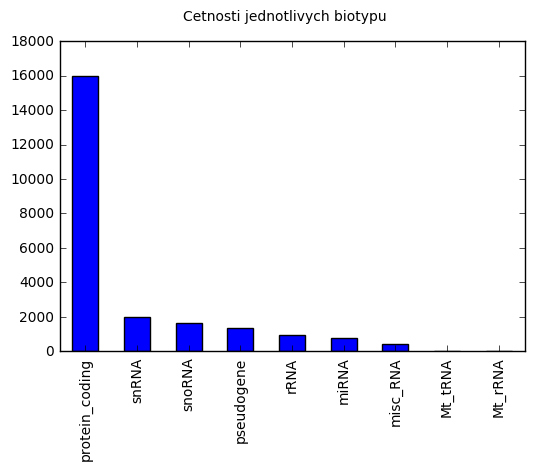

In [35]:
biotype.plot(kind='bar')
pl.suptitle("Cetnosti jednotlivych biotypu")

### Tvorba sloupce "gene_size"

In [36]:
genes["gene_size"] = genes["end"]-genes["start"]

In [37]:
transcripts["gene_size"] = transcripts["end"]-transcripts["start"]

In [38]:
exons["gene_size"] = exons["end"]-exons["start"]

### Koduji nejake geny vice transkriptu?

In [39]:
genes.set_index("gene_id").index.get_duplicates()

[]

In [40]:
transcripts.set_index("transcript_id").index.get_duplicates()

[]

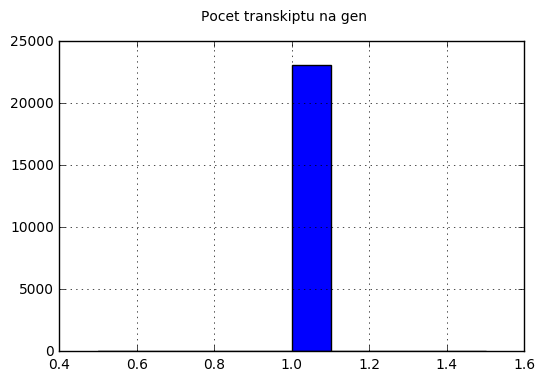

In [41]:
transcripts["gene_id"].value_counts().hist(bins=10)
pl.suptitle("Pocet transkiptu na gen")

In [42]:
genes.loc[genes["gene_id"].isin(genes.set_index("gene_id").index.get_duplicates())]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size


In [43]:
sum(transcripts["gene_id"].value_counts() > 1)

0



Vypada to, ze zadny gen nekoduje vice nez jeden transkript!

## Analyza "genes"


In [44]:
genes.sort_values(["gene_size"], ascending = False).head(10)

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
524,GeneScaffold_3864,ensembl,gene,101262,1148268,.,-,.,protein_coding,ENSOPRG00000005286,LRP1B,1047006
751,GeneScaffold_2206,ensembl,gene,1838,1035806,.,+,.,protein_coding,ENSOPRG00000003910,CNTNAP2,1033968
534,GeneScaffold_116,ensembl,gene,130770,1132465,.,-,.,protein_coding,ENSOPRG00000006224,FANCL,1001695
128,GeneScaffold_95,ensembl,gene,475006,1449302,.,+,.,protein_coding,ENSOPRG00000008853,NRXN3,974296
811,GeneScaffold_4671,ensembl,gene,8071,977180,.,-,.,protein_coding,ENSOPRG00000005649,PARK2,969109
575,GeneScaffold_5107,ensembl,gene,127436,1088045,.,+,.,protein_coding,ENSOPRG00000009615,C10orf11,960609
1096,GeneScaffold_4426,ensembl,gene,16587,966187,.,-,.,protein_coding,ENSOPRG00000007523,NRXN1,949600
424,GeneScaffold_4324,ensembl,gene,43945,953143,.,+,.,protein_coding,ENSOPRG00000010812,PARD3B,909198
1168,GeneScaffold_2341,ensembl,gene,80111,972393,.,+,.,protein_coding,ENSOPRG00000000715,CNTNAP5,892282
37,GeneScaffold_881,ensembl,gene,977105,1865534,.,+,.,protein_coding,ENSOPRG00000016271,WWOX,888429


In [45]:
genes.sort_values(["gene_size"], ascending = False).tail(10)

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
22305,scaffold_54497,ensembl,gene,3310,3340,.,+,.,rRNA,ENSOPRG00000023875,5S_rRNA,30
7113,scaffold_531,ensembl,gene,379791,379821,.,-,.,rRNA,ENSOPRG00000023787,5S_rRNA,30
4871,GeneScaffold_2514,ensembl,gene,500411,500441,.,-,.,rRNA,ENSOPRG00000023763,5S_rRNA,30
19594,scaffold_16208,ensembl,gene,27177,27205,.,+,.,rRNA,ENSOPRG00000023013,5S_rRNA,28
16168,scaffold_4952,ensembl,gene,84231,84257,.,+,.,protein_coding,ENSOPRG00000018795,NaN,26
6095,GeneScaffold_3947,ensembl,gene,171411,171436,.,+,.,rRNA,ENSOPRG00000023054,5S_rRNA,25
6286,scaffold_817,ensembl,gene,160387,160412,.,+,.,rRNA,ENSOPRG00000022737,5S_rRNA,25
16063,scaffold_6958,ensembl,gene,88799,88824,.,-,.,rRNA,ENSOPRG00000022588,5S_rRNA,25
15012,GeneScaffold_3968,ensembl,gene,17147,17169,.,+,.,protein_coding,ENSOPRG00000019122,NaN,22
4412,GeneScaffold_5267,ensembl,gene,144744,144758,.,-,.,protein_coding,ENSOPRG00000019159,NaN,14


### Pocet genu

In [46]:
len(genes["gene_id"].unique())

23065

### Pocet charakterizovanych sekvenci

In [47]:
len(genes["seqname"].unique())

10916

### Kolik genu se nachazi na jakem retezci?

In [48]:
genes["strand"].value_counts()

+    11685
-    11380
Name: strand, dtype: int64

### Kolik je genu bez nazvu (NaN)?

In [49]:
genes["gene_name"].isnull().values.sum()

5086

### Distribuce velikosti genu

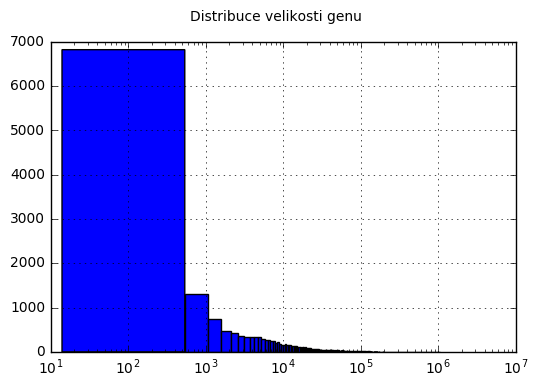

In [50]:
genes["gene_size"].hist(bins=2000)
pl.xscale('log')
pl.suptitle("Distribuce velikosti genu")

## Analyza "transcripts"

### Kolik je transkriptu celkem?

In [51]:
transcripts["transcript_id"].value_counts().sum()

23065

### Kolik transkriptu nema nazev?

In [52]:
transcripts["transcript_name"].isnull().values.sum()

5086

![](https://lh3.googleusercontent.com/-Sgwt5PHgt5k/U60XL-IKJ4I/AAAAAAAAFH4/dvLQsuT8uws/w1600-h1063/American_Pika.jpg)